In [1]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
# from ragas import evaluate
# from ragas.embeddings import LangchainEmbeddingsWrapper
# from ragas.llms import LangchainLLMWrapper
# from ragas.metrics import answer_relevancy, faithfulness, context_recall, context_precision
from dotenv import load_dotenv
import os
# from datasets import Dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time
from pathlib import Path

c:\Users\grays\anaconda3\envs\capstone\Lib\site-packages\pydantic\_internal\_fields.py:161: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
answers = pd.read_csv(Path(r"C:\Users\grays\OneDrive\Documents\GitHub\DataSci210_MedicationDeprescriber\Data\LabeledResponses_ReturnedResponse11_19_24.csv"))
answers

,review_by,validated_by,key,reason,recommendation,diagnosis,GS_response,Note,Rec_Returned,Reasoning
0,Ben,NaN,D6253A5CE371EA,example with gastrointestinal bleed should con...,continue,NaN,This patient has a history of a gastrointestin...,NaN,continue,The recommendation is to continue the medicati...
1,Ben,NaN,DFAFED1811B871,example with a documented history of a GI blee...,continue,NaN,This patient has a history of a gastrointestin...,NaN,continue,The recommendation is to continue the medicati...
2,Ben,NaN,D4865B8BBB294E,example with GI bleeding that occurred during ...,continue,NaN,GI bleeding developed during hospital stay and...,NaN,continue,The recommendation is to continue the medicati...
3,Ben,NaN,D8017C77BA15FA,14d h pylori treatment if pt treated for 2wks ...,stop,NaN,Stop pantoprazole 40mg when H. Pylori treatmen...,NaN,continue,The recommendation is to continue the medicati...
4,Ben,NaN,D45728A2EFD315,"example with esophagitis, continue PPI",continue,NaN,Patient should continue pantoprazole based on ...,NaN,continue,The recommendation is to continue the medicati...
5,Ben,NaN,DFB07E6B8F0957,example with chronic NSAID use and pharmacist ...,stop,NaN,Patient should stop lansoprazole 30mg twice da...,NaN,continue,The recommendation is to continue the medicati...
6,Ben,NaN,D1BD3665C06499,example where pt should be on due to history o...,continue,NaN,Patinet should continue omeprazole 40mg twice ...,NaN,stop,The recommendation is to stop the medication d...
7,Ben,NaN,D068E26FFF9F43,example where pt came in on and no clear reaso...,stop,NaN,Patient came in on lansoprazole 30mg. No clea...,NaN,deprescribe,The recommendation is to deprescribe omeprazol...
8,Ben,NaN,SyntheticPt1,Pt completed treatment for H Pylori while inpa...,stop,NaN,Patient was admitted on H pylori treatment but...,NaN,stop,The recommendation is to stop the medication d...
9,Ben,NaN,SyntheticPt2,Pt currently taking ibuprofen and at high risk...,continue,NaN,Patient is on 400mg ibuprofen three times dail...,NaN,deprescribe,The recommendation is to deprescribe the proto...


In [3]:
y_true = answers[["recommendation"]]
y_true

,recommendation
0,continue
1,continue
2,continue
3,stop
4,continue
5,stop
6,continue
7,stop
8,stop
9,continue


In [4]:
y_pred = answers[["Rec_Returned"]]
y_pred

,Rec_Returned
0,continue
1,continue
2,continue
3,continue
4,continue
5,continue
6,stop
7,deprescribe
8,stop
9,deprescribe


In [5]:
class_labels = ['continue', 'deprescribe', 'stop']

Accuracy: 0.7000
Balanced Accuracy: 0.7222
Precision (Macro Avg): 0.7083
Recall (Macro Avg): 0.7222
F1 Score (Macro Avg): 0.6917

Classification Report:
               precision    recall  f1-score   support

    continue       0.75      0.67      0.71         9
 deprescribe       0.62      1.00      0.77         5
        stop       0.75      0.50      0.60         6

    accuracy                           0.70        20
   macro avg       0.71      0.72      0.69        20
weighted avg       0.72      0.70      0.69        20



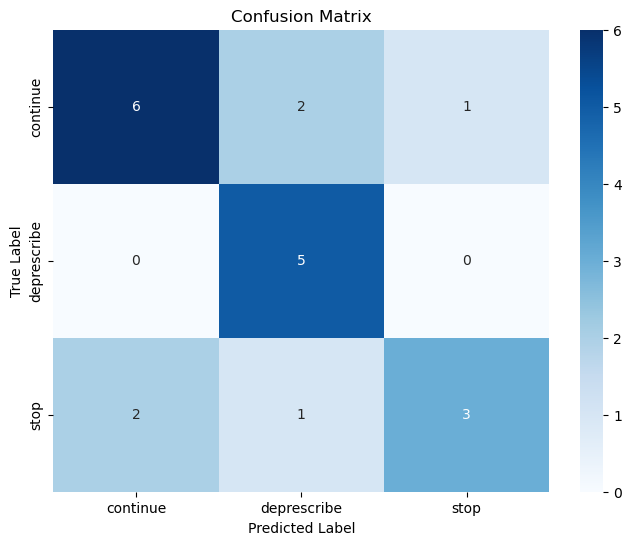

In [6]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_true, y_pred)

# Precision, Recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')  # macro-averaging

# Classification report (optional detailed breakdown for each class)
class_report = classification_report(y_true, y_pred, target_names=class_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"Recall (Macro Avg): {recall:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()